# Jupyter Notebook  problems in the Essentials of Paleomagnetism Textbook by L. Tauxe

## Problems in Chapter 3

### Problem 1a

Calculate the magnetostatic interaction energy for one Bohr magneton in a field of 40 $\mu$T and plot for angles 0 $\rightarrow$ 180. To do anything, we need to import **numpy** and **matplotlib** first. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# This allows us to plot in the notebook environment

Use the equation: $E=-m_b B \cos(\theta)$ for range of $\theta$s. 

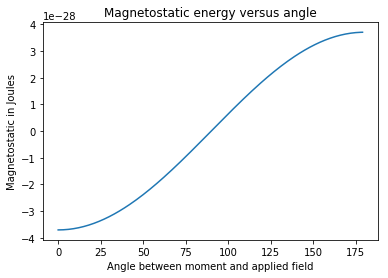

In [2]:
# define some variables
mb=9.27e-24 # one Bohr magneton in Am^2
B=40e-6 # field in tesla
thetas=np.arange(0,180,1) # makes an array of thetas from 0 to 180
Es=-mb*B*np.cos(np.radians(thetas)) # makes an array of energies
plt.plot(thetas,Es) # make a nice plot
plt.title("Magnetostatic energy versus angle")
plt.xlabel("Angle between moment and applied field") # label x axis
plt.ylabel("Magnetostatic in Joules"); # label y axis 
# putting a ';' at the end of the plotting block suppresses an annoying announcement

## Problem 1b

For the rest of the problem we need to know the thermal energy (Bolzmann's constant $k=1.38 x 10^{-23}$ J/K and the absolute temperature $T=300$ Kelvin.  

In [3]:
k=1.38e-23
T=300
print ('Thermal energy at room temperature is: ',k*T)

Thermal energy at room temperature is:  4.14e-21


Which is a LOT bigger than the magnetostatic energy. 

## Problem 2a

We must find the induced  moment $m$ knowing that the magnetetization (moment per unit volume) is  $M=\chi_p H$ for a paramagnetic substance.  For Fayalite $\chi_p$ = = 4.4 x 10$^{-4}$ (cgs; per unit volume). 

In [4]:
chi_p=4.4e-4 # susceptibility of fayalite in cgs per volume
B = 10. # applied field in Oersteds
vol=2. # volume in cm^3
M=chi_p*B # magnetization
m=M*vol # moment in emu
print (m)


0.0088


## Problem 2b

Now we have to convert everything to SI. 

$\chi_{SI} = 4\pi\chi_{cgs}$

$H_{SI}={{H_{cgs}}\over {4\pi 10^{-3}}}$

$vol_{SI}={{vol_{cgs}}*{10^{-6}}}$ 


In [5]:
chi_SI=chi_p*4.*np.pi
H_SI = B/(np.pi*4.*1e-3)
vol_SI=vol*1e-6
M_SI=H_SI*chi_SI
m_SI=M_SI*vol_SI
print ('Magnetization in A/m is: ',M_SI)
print ('magnetic moment in Am^2 is: ',m_SI)

Magnetization in A/m is:  4.3999999999999995
magnetic moment in Am^2 is:  8.799999999999999e-06


Now we have to convert the $m$ in Am$^2$ to emu cm$^{-3}$ by muliplying by 10$^3$.

In [6]:
m_cgs=m_SI*1e3
print ('converted to cgs, m is: ',m_cgs)

converted to cgs, m is:  0.008799999999999999


## Problem 3

The governing equation here is the Curie Law of  paramagnetic susceptibility (Equation 3.6 in the text):
$$
\chi_p={M\over H} =  {{Nm^2\mu_o}\over{3kv}}\cdot {1\over T}.
$$

which shows that $\chi_p$ is inversely related to temperature. We were given $\chi_p$ at 273K, so at 773K, we have:
$$
\chi_{773} = {\chi_{273}} { 273\over{773}} = { 4.4 \times 10^{-4}  } { 273\over{773}} = 1.6 \times 10^{-4} { {\hbox {emu}} \over {\hbox {cm}^3 \hbox{oe}}}
$$

So if $H$ = 100 oe at T= 773K:  

$$
M = \chi_{773} H = 1.6 \times 10^{-2} { {\hbox {emu}} \over {\hbox {cm}^3 }}
$$



## Problem 4

Here again we use the Curie Law of Paramagnetism:
$$
\chi_p =  {N\over v} m_b^2 { {\mu_o}\over {3kT}} .
$$

${N\over v}$ is the number of atomic magnetic moments per unit volume.  The number of atoms was   given to us as 4 x 10$^{28}$ per m$^3$ and ${\bf m_b}$ is their moment (the Bohr magneton).   Looking up from Figure 3.4 in the text we find that there are 5 unpaired spins for Mn$^{2+}$.   So ${N\over v}$ is 20 x 10$^{28}$.    The other parameters are given in the text as $\mu_o = 4 \pi$ x 10$^{-7}$ Hm$^{-1}$,  $m_b$ = 9.27 x 10$^{-24}$ Am$^2$ and $k$ = 1.381 x 10$^{-23}$ JK$^{-1}$.   So,  $\chi_p \sim 1.7$ x 10$^{-3}$.  


## Problem 5

For this problem, we need to find the data file curie\_example.dat that is in the curie folder in the Datafiles folder that comes with PmagPy.  Copy it into the same folder that has this notebook.  Read it in and make a simple X,Y plot of the data.  

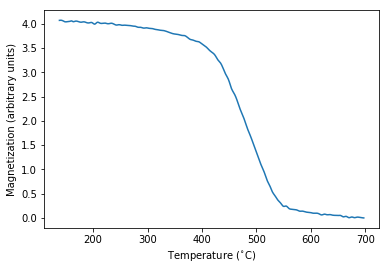

In [11]:
data=np.loadtxt('curie_example.dat').transpose() # read in data
plt.plot(data[0],data[1]) # plot magnetization against temperature
plt.xlabel(r'Temperature ($^{\circ}$C)') # label x axis
plt.ylabel('Magnetization (arbitrary units)'); # label y axis
           

Now use the **ipmag** version for plotting Curie Temperature data **ipmag.curie( )**.  See ee how the second derivative method works?  You will see that the Curie Temperature is $\sim$ 550$^{\circ}$C.

In [17]:
import pmagpy.ipmag as ipmag
help(ipmag.curie)


Help on function curie in module pmagpy.ipmag:

curie(path_to_file='.', file_name='magic_measurements.txt', window_length=3, save=False, save_folder='.', fmt='svg')
    Plots and interprets curie temperature data.
    ***
    The 1st derivative is calculated from smoothed M-T curve (convolution
    with trianfular window with width= <-w> degrees)
    ***
    The 2nd derivative is calculated from smoothed 1st derivative curve
    (using the same sliding window width)
    ***
    The estimated curie temp. is the maximum of the 2nd derivative.
    Temperature steps should be in multiples of 1.0 degrees.
    
    Optional Parameters (defaults are used if not specified)
    ----------
    path_to_file : path to directory that contains file (default is current directory, '.')
    file_name : name of file to be opened (default is 'magic_measurements.txt')
    window_length : dimension of smoothing window (input to smooth() function)
    save : boolean argument to save plots (default is False)

And now let's call it..  

second derivative maximum is at T=205


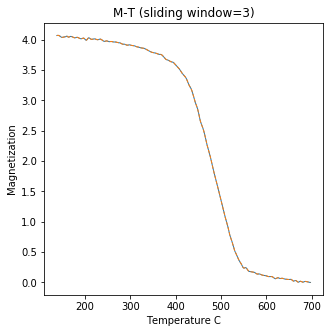

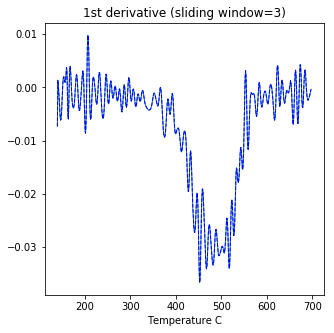

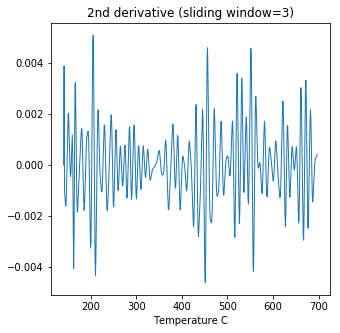

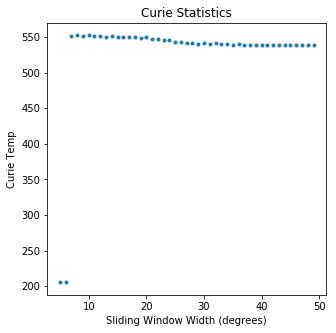

In [18]:
ipmag.curie(file_name='curie_example.dat')